In [2]:
import ee
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWgZu4rgp4UUvwOBfCuIk2n1_fALA9Pjun8DAywID6b7TVlXmNzlcXk

Successfully saved authorization token.


In [4]:
chl = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI').select(['chlor_a',]).filterDate('2016-01-01', '2018-01-31');
sst = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI').select(['sst',]).filterDate('2016-01-01', '2018-01-31');
poc = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI').select(['poc',]).filterDate('2016-01-01', '2018-01-31');

lon = -64
lat = 31

cntr = ee.Geometry.Point(lon,lat)

In [19]:
print(chl)

ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.filter",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.map",
          "arguments": {
            "baseAlgorithm": {
              "functionDefinitionValue": {
                "argumentNames": [
                  "_MAPPING_VAR_0_0"
                ],
                "body": {
                  "functionInvocationValue": {
                    "functionName": "Image.select",
                    "arguments": {
                      "bandSelectors": {
                        "constantValue": [
                          "chlor_a"
                        ]
                      },
                      "input": {
                        "argumentReference": "_MAPPING_VAR_0_0"
                      }
                    }
                  }
                }
              }
            },
            "collection": {
              "functionI

In [25]:
# # Load a Landsat image.
# img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# # Print image object WITHOUT call to getInfo(); prints serialized request instructions.
# print(img)

# # Print image object WITH call to getInfo(); prints image metadata.
# print(img.getInfo())

In [14]:
import pandas as pd
import numpy as np

scale = 1000
chla=chl.getRegion(cntr, scale).getInfo()

def valid_row(row):
    return row[4] != None

valid = [valid_row(rw) for rw in chla]
data = np.array(chla)[valid]
data

array([['id', 'longitude', 'latitude', 'time', 'chlor_a'],
       ['A2016015', -64.00047241709531, 30.99636887854409, 1452817501000,
        0.14064337313175201],
       ['A2016053', -64.00047241709531, 30.99636887854409, 1456099201000,
        0.12395969778299332],
       ['A2016055', -64.00047241709531, 30.99636887854409, 1456274701000,
        0.11515573412179947],
       ['A2016060', -64.00047241709531, 30.99636887854409, 1456704000000,
        0.099634550511837],
       ['A2016061', -64.00047241709531, 30.99636887854409, 1456790701000,
        0.09542179852724075],
       ['A2016068', -64.00047241709531, 30.99636887854409, 1457395801000,
        0.10689094662666321],
       ['A2016070', -64.00047241709531, 30.99636887854409, 1457568000000,
        0.09170614928007126],
       ['A2016087', -64.00047241709531, 30.99636887854409, 1459039501000,
        0.08918135613203049],
       ['A2016088', -64.00047241709531, 30.99636887854409, 1459124401000,
        0.0674537643790245],
       [

In [20]:
chla

[['id', 'longitude', 'latitude', 'time', 'chlor_a'],
 ['A2016001', -64.00047241709531, 30.99636887854409, 1451607301000, None],
 ['A2016002', -64.00047241709531, 30.99636887854409, 1451694300000, None],
 ['A2016003', -64.00047241709531, 30.99636887854409, 1451779500000, None],
 ['A2016004', -64.00047241709531, 30.99636887854409, 1451866201000, None],
 ['A2016005', -64.00047241709531, 30.99636887854409, 1451952000000, None],
 ['A2016006', -64.00047241709531, 30.99636887854409, 1452038401000, None],
 ['A2016007', -64.00047241709531, 30.99636887854409, 1452127201000, None],
 ['A2016008', -64.00047241709531, 30.99636887854409, 1452212401000, None],
 ['A2016009', -64.00047241709531, 30.99636887854409, 1452299401000, None],
 ['A2016010', -64.00047241709531, 30.99636887854409, 1452384601000, None],
 ['A2016011', -64.00047241709531, 30.99636887854409, 1452471601000, None],
 ['A2016012', -64.00047241709531, 30.99636887854409, 1452556801000, None],
 ['A2016013', -64.00047241709531, 30.9963688785

In [16]:
df_chl = pd.DataFrame(data[1:],columns=data[0])
df_chl

,id,longitude,latitude,time,chlor_a
0,A2016015,-64.000472,30.996369,1452817501000,0.140643
1,A2016053,-64.000472,30.996369,1456099201000,0.12396
2,A2016055,-64.000472,30.996369,1456274701000,0.115156
3,A2016060,-64.000472,30.996369,1456704000000,0.099635
4,A2016061,-64.000472,30.996369,1456790701000,0.095422
...,...,...,...,...,...
139,A2018014,-64.000472,30.996369,1515889801000,0.152992
140,A2018020,-64.000472,30.996369,1516407901000,0.117942
141,A2018021,-64.000472,30.996369,1516494900000,0.143889
142,A2018023,-64.000472,30.996369,1516668601000,0.153198


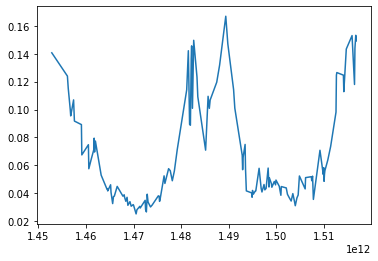

In [17]:
import matplotlib.pyplot as plt
x=df_chl['time']
y=df_chl['chlor_a']
plt.plot(x,y)